In [1]:
import pandas as pd

# Load the Titanic dataset from the uploaded file
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect its structure
titanic_data.head(), titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Drop irrelevant columns
titanic_data_cleaned = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='median')  # Use median for numerical data
titanic_data_cleaned['Age'] = imputer.fit_transform(titanic_data_cleaned[['Age']])

# Fill missing 'Embarked' values with the most frequent value
titanic_data_cleaned['Embarked'] = titanic_data_cleaned['Embarked'].fillna(titanic_data_cleaned['Embarked'].mode()[0])

# Encode categorical variables
encoder = LabelEncoder()
titanic_data_cleaned['Sex'] = encoder.fit_transform(titanic_data_cleaned['Sex'])
titanic_data_cleaned['Embarked'] = encoder.fit_transform(titanic_data_cleaned['Embarked'])

# Split data into features and target variable
X = titanic_data_cleaned.drop('Survived', axis=1)
y = titanic_data_cleaned['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), X_test.head(), y_train.head(), y_test.head()


(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 331       1    1  45.5      0      0  28.5000         2
 733       2    1  23.0      0      0  13.0000         2
 382       3    1  32.0      0      0   7.9250         2
 704       3    1  26.0      1      0   7.8542         2
 813       3    0   6.0      4      2  31.2750         2,
      Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 709       3    1  28.0      1      1  15.2458         0
 439       2    1  31.0      0      0  10.5000         2
 840       3    1  20.0      0      0   7.9250         2
 720       2    0   6.0      0      1  33.0000         2
 39        3    0  14.0      1      0  11.2417         0,
 331    0
 733    0
 382    0
 704    0
 813    0
 Name: Survived, dtype: int64,
 709    1
 439    0
 840    0
 720    1
 39     1
 Name: Survived, dtype: int64)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


(0.8100558659217877,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n',
 array([[90, 15],
        [19, 55]], dtype=int64))

In [3]:
import chardet

# Read a small portion of the file to detect encoding
with open('movie dataset.csv', 'rb') as file:
    raw_data = file.read(10000)
    result = chardet.detect(raw_data)
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [5]:
import pandas as pd

# Replace 'detected_encoding' with the actual detected encoding (e.g., 'ISO-8859-1')

movie_data = pd.read_csv('movie dataset.csv', encoding='ISO-8859-1')
print(movie_data.head())
print(movie_data.info())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [13]:
print(movie_data.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
movie_data = pd.read_csv('movie dataset.csv', encoding='ISO-8859-1')

# Features and target
X = movie_data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = movie_data['Rating']

# Handle missing values
X = X.fillna('Unknown')  # Replace NaN with a placeholder
y = y.fillna(y.mean())  # Replace NaN in target with mean

# Encode categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')


MSE: 3.4709718006647114
R²: -2.606289245250592


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (replace 'movie_dataset.csv' with your file path)
file_path = 'movie dataset.csv'
movie_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information about the dataset
print("Dataset Info:")
print(movie_data.info())

# Display first few rows
print("First 5 rows:")
print(movie_data.head())

# Check for missing values
print("Missing Values:")
print(movie_data.isnull().sum())

# Handle missing values (example: fill NaN in categorical columns with 'Unknown')
movie_data.fillna({'Genre': 'Unknown', 'Director': 'Unknown', 
                   'Actor 1': 'Unknown', 'Actor 2': 'Unknown', 
                   'Actor 3': 'Unknown'}, inplace=True)

# Select features and target variable
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

# Ensure the target column is numeric (convert if necessary)
movie_data[target] = pd.to_numeric(movie_data[target], errors='coerce')

# Drop rows with missing target values
movie_data = movie_data.dropna(subset=[target])

# Define features (X) and target (y)
X = movie_data[features]
y = movie_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

# Define the model (you can switch to RandomForestRegressor or another model if needed)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Analyze feature importance if using RandomForestRegressor
if isinstance(model.named_steps['regressor'], RandomForestRegressor):
    feature_importances = model.named_steps['regressor'].feature_importances_
    encoded_feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(features)
    feature_importance_df = pd.DataFrame({
        'Feature': encoded_feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(feature_importance_df)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
First 5 rows:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram 

In [3]:
import pandas as pd

# Load the dataset
file_path = 'advertising.csv'  # Ensure this matches your actual file path
advertising_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print(advertising_data.info())
print(advertising_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [17]:
# Step 1: Basic Information about the Dataset
# Check the structure of the data, column types, and summary statistics
dataset_info = advertising_data .info()
summary_statistics = advertising_data .describe()

# Step 2: Checking for Missing Values
missing_values = advertising_data .isnull().sum()

# Step 3: Exploratory Data Analysis (EDA)
# Calculate correlations between features and visualize them
correlations = advertising_data .corr()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


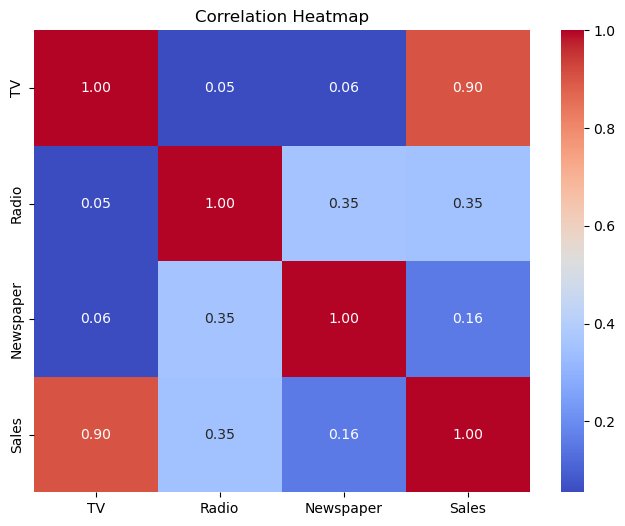

In [13]:
# Step 4: Visualization of Data Relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

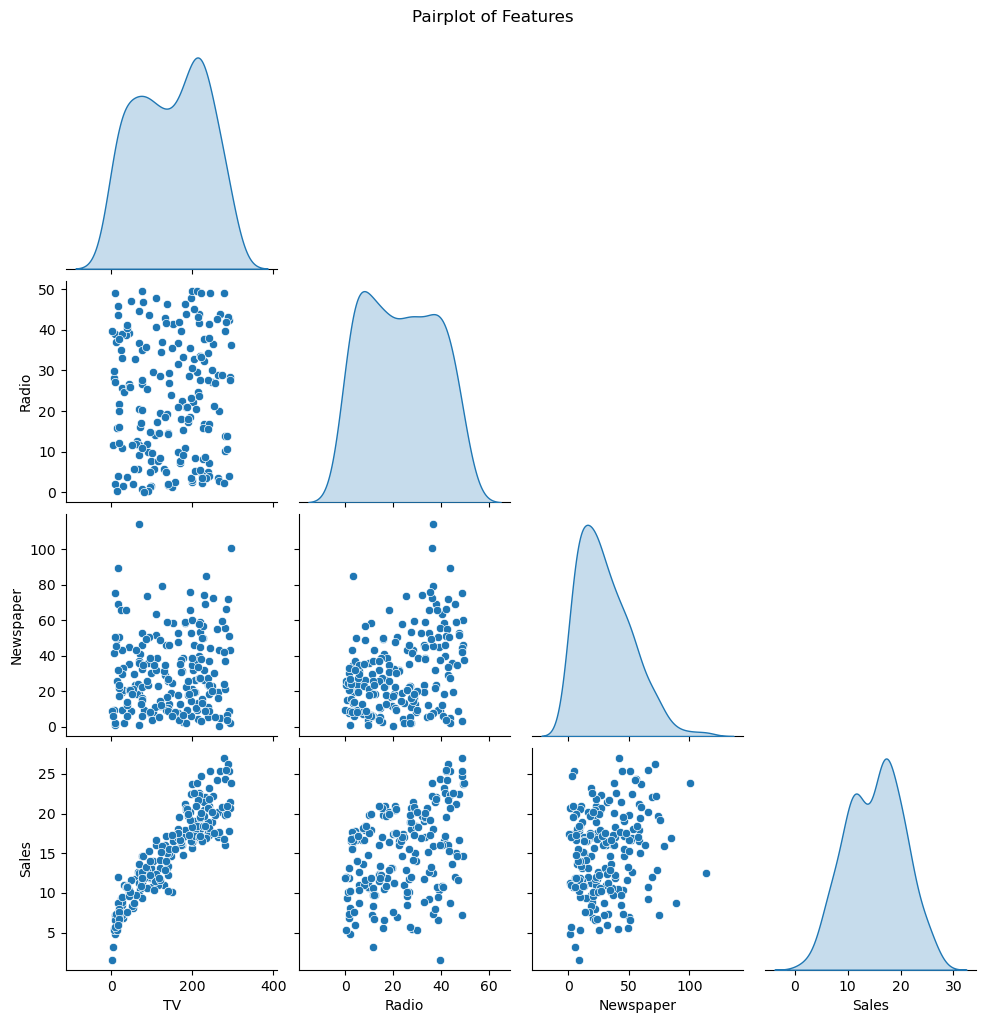

(None,
                TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000
 mean   147.042500   23.264000   30.554000   15.130500
 std     85.854236   14.846809   21.778621    5.283892
 min      0.700000    0.000000    0.300000    1.600000
 25%     74.375000    9.975000   12.750000   11.000000
 50%    149.750000   22.900000   25.750000   16.000000
 75%    218.825000   36.525000   45.100000   19.050000
 max    296.400000   49.600000  114.000000   27.000000,
 TV           0
 Radio        0
 Newspaper    0
 Sales        0
 dtype: int64,
                  TV     Radio  Newspaper     Sales
 TV         1.000000  0.054809   0.056648  0.901208
 Radio      0.054809  1.000000   0.354104  0.349631
 Newspaper  0.056648  0.354104   1.000000  0.157960
 Sales      0.901208  0.349631   0.157960  1.000000)

In [15]:
# Pairplot to visualize relationships between variables
sns.pairplot(advertising_data , diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Display results
dataset_info, summary_statistics, missing_values, correlations